# Visualization of Data 

Visualization of feature distribution and grid search

In [133]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



In [134]:
sns.set(rc={"figure.figsize":(6,6)})
np.random.seed(sum(map(ord,"palettes")))

In [137]:
from utils.DatasetPrep import *


In [138]:
mat = np.loadtxt("dim_reduc.csv", delimiter=',')
print mat.shape

print mat[0,:]
data=pd.DataFrame(mat, columns=['first PC', 'second PC'])

(2000, 2)
[ 44.86618505  37.0325053 ]


In [139]:
sns.set()

Using a t-SNE implementation found here: https://lvdmaaten.github.io/tsne/, we tried to reduce the dimensionality of our data to enhance visualization and examine the distribution. 

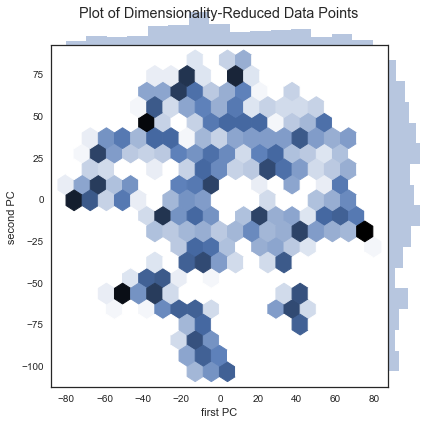

In [140]:
with sns.axes_style("white"):
    g = sns.jointplot(x = 'first PC', y='second PC', data=data, kind="hex", space=0, stat_func=None, marginal_kws=dict(bins=15), ratio=10)
    g.fig.suptitle('Plot of Dimensionality-Reduced Data Points')

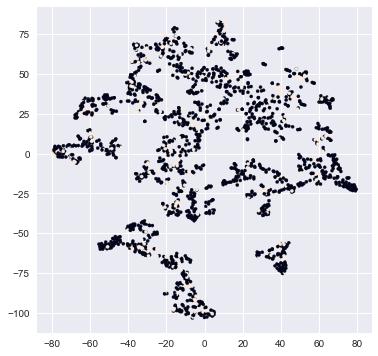

In [141]:
plt.scatter(mat[:,0], 
            mat[:,1], 
            s=10, 
            c=labels)

These should actually be colored but the point is that it's hard to tell our two classes apart. Next, we want to load in our features and visualize those. 

In [143]:
textures = np.loadtxt("text_ft.csv", delimiter=',')
colors = np.loadtxt("color_ft.csv", delimiter=',')

In [144]:
TOTAL_MAX = 1000
EACH_MAX = 80
MELANOMA = 1.0
BENIGN = 0.0
mel_indices = []
ben_indices = []
for c, label in enumerate(labels[:TOTAL_MAX]):
    #print mel_indices, len(mel_indices), c, MELANOMA
    #print ben_indices, len(ben_indices), c, BENIGN
    if len(mel_indices) < EACH_MAX and label == MELANOMA: 
        mel_indices.append(c)
    if len(ben_indices) < EACH_MAX and label == BENIGN:
        ben_indices.append(c)
    
print len(mel_indices)
print len(ben_indices)

        

80
80


Text(0.5,1,u'Color distribution, Melanomas (80)')

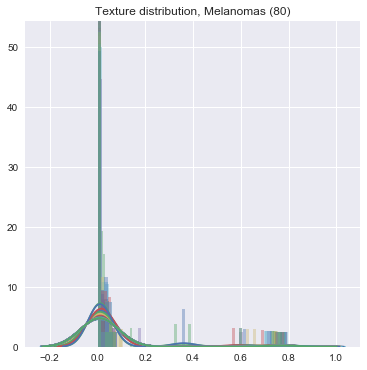

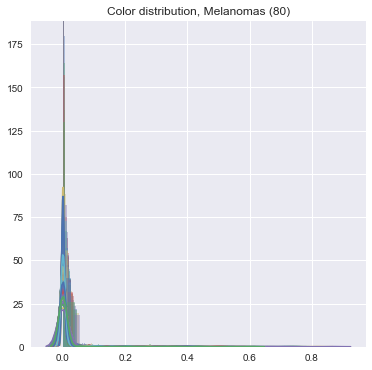

In [135]:
plt.figure()
for i in mel_indices:
    g = sns.distplot(textures[i])
g.axes.set_title('Texture distribution, Melanomas (80)')

plt.figure()
for i in mel_indices:
    g = sns.distplot(colors[i])
g.axes.set_title('Color distribution, Melanomas (80)')

Text(0.5,1,u'Color distribution, Benign (80)')

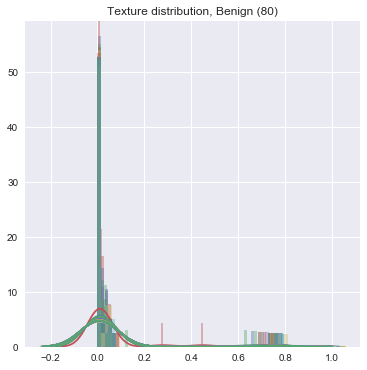

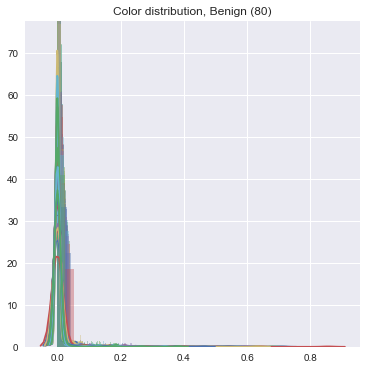

In [136]:
plt.figure()
for i in ben_indices:
    g = sns.distplot(textures[i])
g.axes.set_title('Texture distribution, Benign (80)')

plt.figure()
for i in ben_indices:
    g = sns.distplot(colors[i])
g.axes.set_title('Color distribution, Benign (80)')

# Visualization of grid search

Use a heatmap to visualize the result of the grid search over tuning parameters C and class_weight. 

In [70]:
grid = np.array([
                [[0.81300625, 0, 1.], 
                  [0.81300625, 0.,1.], 
                  [0.81300625, 0., 1.], 
                  [0.81300625, 0., 1.], 
                  [0.81300625, 0., 1.], 
                  [0.80902615, 0., 0.99507995],
                  [0.80454605, 0.0026738, 0.98892989],
                  [0.79707588, 0.00802139, 0.97847478]], 
                 [[ 0.81300625, 0., 1.], 
                  [0.81300625, 0., 1.],
                  [0.81250874, 0.,  0.99938499],
                  [ 0.81250874,   0.,  0.99938499],
                  [ 0.80802115, 0.,       0.99384994], 
                  [ 0.80354854,  0.00802139,  0.98646986],
                  [ 0.80106846 , 0.02673797,  0.97908979],
                  [ 0.79109824,  0.02941176,  0.96617466]],
                [[ 0.81300625 , 0. , 1. ],
                 [ 0.81250874 ,  0. ,         0.99938499],
                 [ 0.81200874 , 0.  ,        0.99876999],
                 [ 0.81100623 , 0.   ,       0.99753998],
                 [ 0.8065311 ,  0.00802139 , 0.9901599 ],
                 [ 0.80106846,  0.02673797,  0.97908979],
                 [ 0.79957093,  0.02941176 , 0.97662977],
                 [ 0.78510309 , 0.04010695,  0.95633456]],
                [[ 0.81250874,  0.,          0.99938499],
                 [ 0.81250874,  0. ,         0.99938499],
                 [ 0.81200874,  0.,          0.99876999],
                 [ 0.81050871 , 0.,          0.99692497],
                 [ 0.80554608 , 0.02139037,  0.98585486],
                 [ 0.80106846 , 0.02941176,  0.97847478],
                 [ 0.79657336 , 0.03743316,  0.97109471],
                 [ 0.77960297 , 0.04278075 , 0.94895449]],
                [[ 0.81250874,  0.  ,        0.99938499],
                 [ 0.81200874  ,0. ,         0.99876999],
                 [ 0.81100623,  0.   ,       0.99753998],
                 [ 0.81150871 , 0.00802139,  0.99630996],
                 [ 0.80554608 , 0.02406417 , 0.98523985],
                 [ 0.80206598,  0.03743316  ,0.97785978],
                 [ 0.7905907  , 0.04010695 , 0.96309963],
                 [ 0.77959045 , 0.05614973 , 0.94587946]],
                [[ 0.81250874 , 0.   ,       0.99938499],
                 [ 0.81200874 , 0. ,         0.99876999],
                 [ 0.81100871 , 0.0026738 ,  0.99692497],
                 [ 0.81201623 , 0.01604278 , 0.99507995],
                 [ 0.80605108 , 0.02941176 , 0.98462485],
                 [ 0.79857839,  0.04010695 , 0.97293973],
                 [ 0.78810314 , 0.04010695 , 0.9600246 ],
                 [ 0.77658286 , 0.06417112 , 0.9403444 ]],
                [[ 0.81200874 , 0.   ,       0.99876999],
                 [ 0.81200874 , 0.   ,       0.99876999],
                 [ 0.81100871 , 0.0026738 ,  0.99692497],
                 [ 0.81301625 , 0.02139037 , 0.99507995],
                 [ 0.80605108 , 0.03743316 , 0.98277983],
                 [ 0.79857839 , 0.04010695,  0.97293973],
                 [ 0.78910565 , 0.04545455  ,0.9600246 ],
                 [ 0.77209025 , 0.06417112 , 0.93480935]],
                [[ 0.81200874 , 0.   ,       0.99876999],
                 [ 0.81150874 , 0.   ,       0.99815498],
                 [ 0.81100871 , 0.0026738  , 0.99692497],
                 [ 0.81301625 , 0.02139037 , 0.99507995],
                 [ 0.80356351 , 0.04010695 , 0.97908979],
                 [ 0.79807588 , 0.04010695,  0.97232472],
                 [ 0.78860314  ,0.04545455 , 0.95940959],
                 [ 0.77158274 , 0.07219251 , 0.93234932]]])

In [128]:
def VisualizeTuning(grid, X_bounds, Y_bounds, measure, vmin=None, vmax=None, dim=0):

    (X_low, X_high, X_step) = X_bounds
    Y_low, Y_high, Y_step = Y_bounds

    #plt.figure(figsize=(8, 6))
    #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    #plt.imshow(grid[:,:,0], interpolation='nearest', cmap=plt.cm.hot)
    ax = sns.heatmap(grid[:,:,dim], 
                     xticklabels=np.arange(X_low, X_high, X_step), 
                     yticklabels=np.arange(Y_low, Y_high, Y_step),
                     vmin=vmin, 
                     vmax=vmax,
                     cmap="YlGnBu")
    plt.xlabel('Melanoma Class Weight')
    plt.ylabel('C')
    #plt.colorbar()
    #g.axes.xticks(np.arange(8), np.arange(X_low, X_high, X_step))
    #g.axes.yticks(np.arange(8), np.arange(Y_low, Y_high, Y_step))
    ax.set_title('Exploration -- 10-fold CV %s'%measure)
    plt.show()


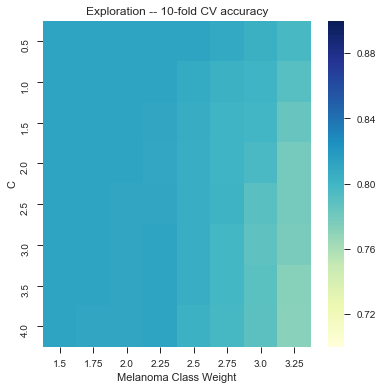

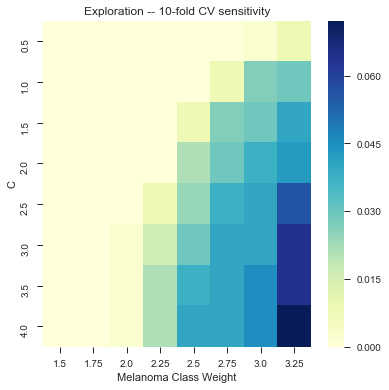

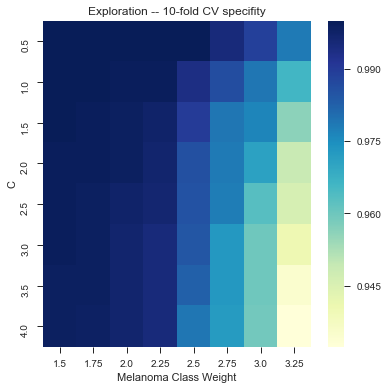

In [129]:
VisualizeTuning(grid, (1.5, 3.5, .25), (.5, 4.5, .5), 'accuracy', vmin=.7, vmax=.9, dim=0)
VisualizeTuning(grid, (1.5, 3.5, .25), (.5, 4.5, .5),'sensitivity', dim=1)
VisualizeTuning(grid, (1.5, 3.5, .25), (.5, 4.5, .5), 'specifity', dim=2)